In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("/content/sample_data/telco_customer_churn.csv")


df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [4]:


df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})



In [5]:
## Imbalanced Dataset Check
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


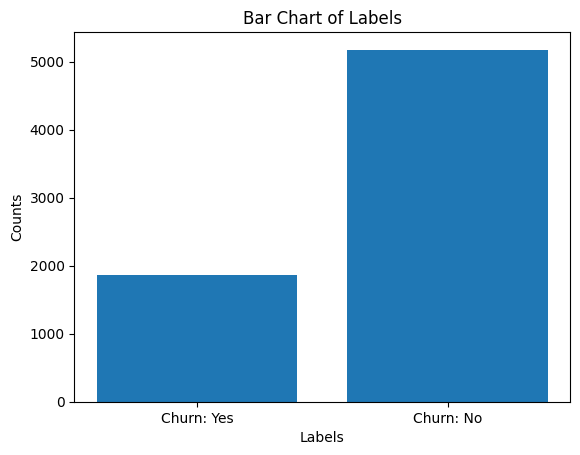

In [6]:
## Bar chart for showing imbalanced dataset
lables= ['Churn: Yes', 'Churn: No']
values= [1869,5174]
plt.bar(lables,values)
plt.xlabel("Labels")
plt.ylabel("Counts")
plt.title("Bar Chart of Labels")
plt.show()


EDA

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
print ('Shape of the dataset is {}. This dataset contains {} rows and {} columns.'.format(df.shape,df.shape[0],df.shape[1]))

Shape of the dataset is (7043, 21). This dataset contains 7043 rows and 21 columns.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
##Selecting numerical features
numerical_data = df.select_dtypes(include='number')

#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 4 numerical features: 

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn']


In [10]:
# Selecting categorical features
categorical_data = df.select_dtypes(include='object')

# Convert column names to list
categorical_features = categorical_data.columns.tolist()

print(f"There are {len(categorical_features)} categorical features:\n")
print(categorical_features)

There are 17 categorical features:

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']


In [11]:
# Transposed stats for numerical features

numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
Churn,7043.0,0.265370,0.441561,0.00,0.0,0.00,1.00,1.00


In [12]:
# Transposed stats for categorical features

categorical_data.describe().T

,count,unique,top,freq
customerID,7043,7043,3186-AJIEK,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [13]:
numerical_data.var()

,0
SeniorCitizen,0.135875
tenure,603.168108
MonthlyCharges,905.410934
Churn,0.194976


In [14]:
numerical_data.skew()

,0
SeniorCitizen,1.833633
tenure,0.239540
MonthlyCharges,-0.220524
Churn,1.063031


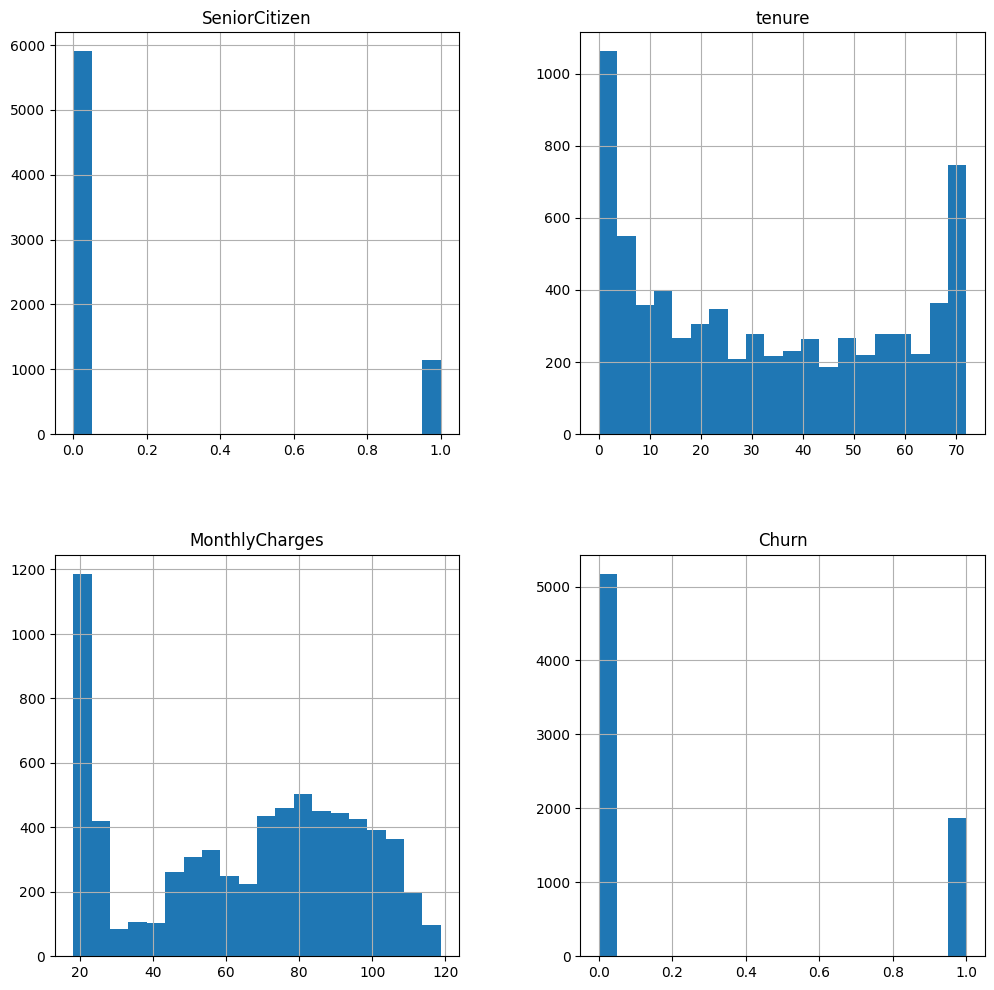

In [15]:
numerical_data.hist(figsize=(12,12),bins=20)
plt.show()

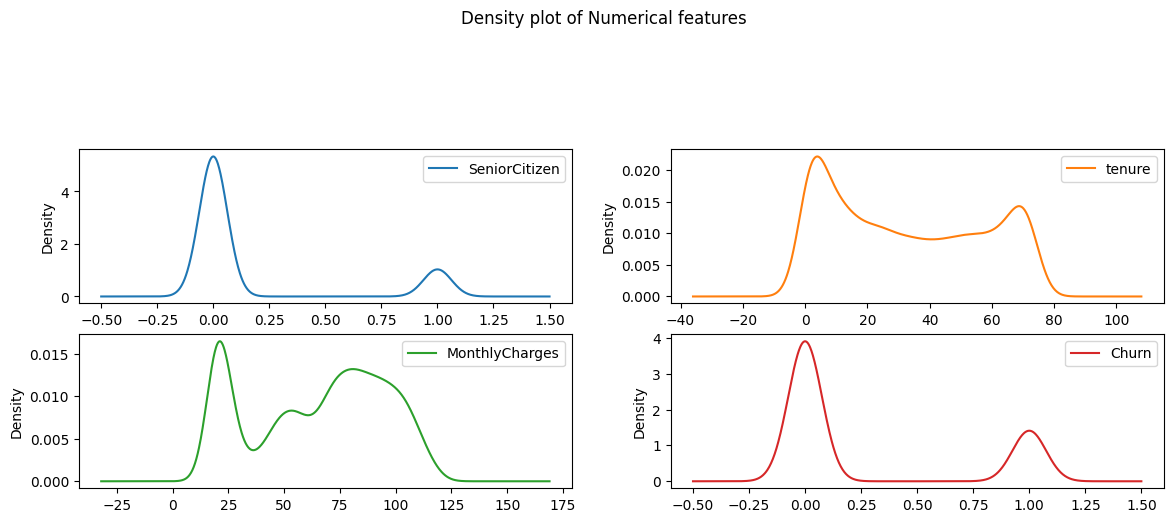

In [ ]:
numerical_data.plot(kind='density',figsize=(14,14),subplots=True,layout=(6,2),title="Density plot of Numerical features",sharex=False)
plt.show()

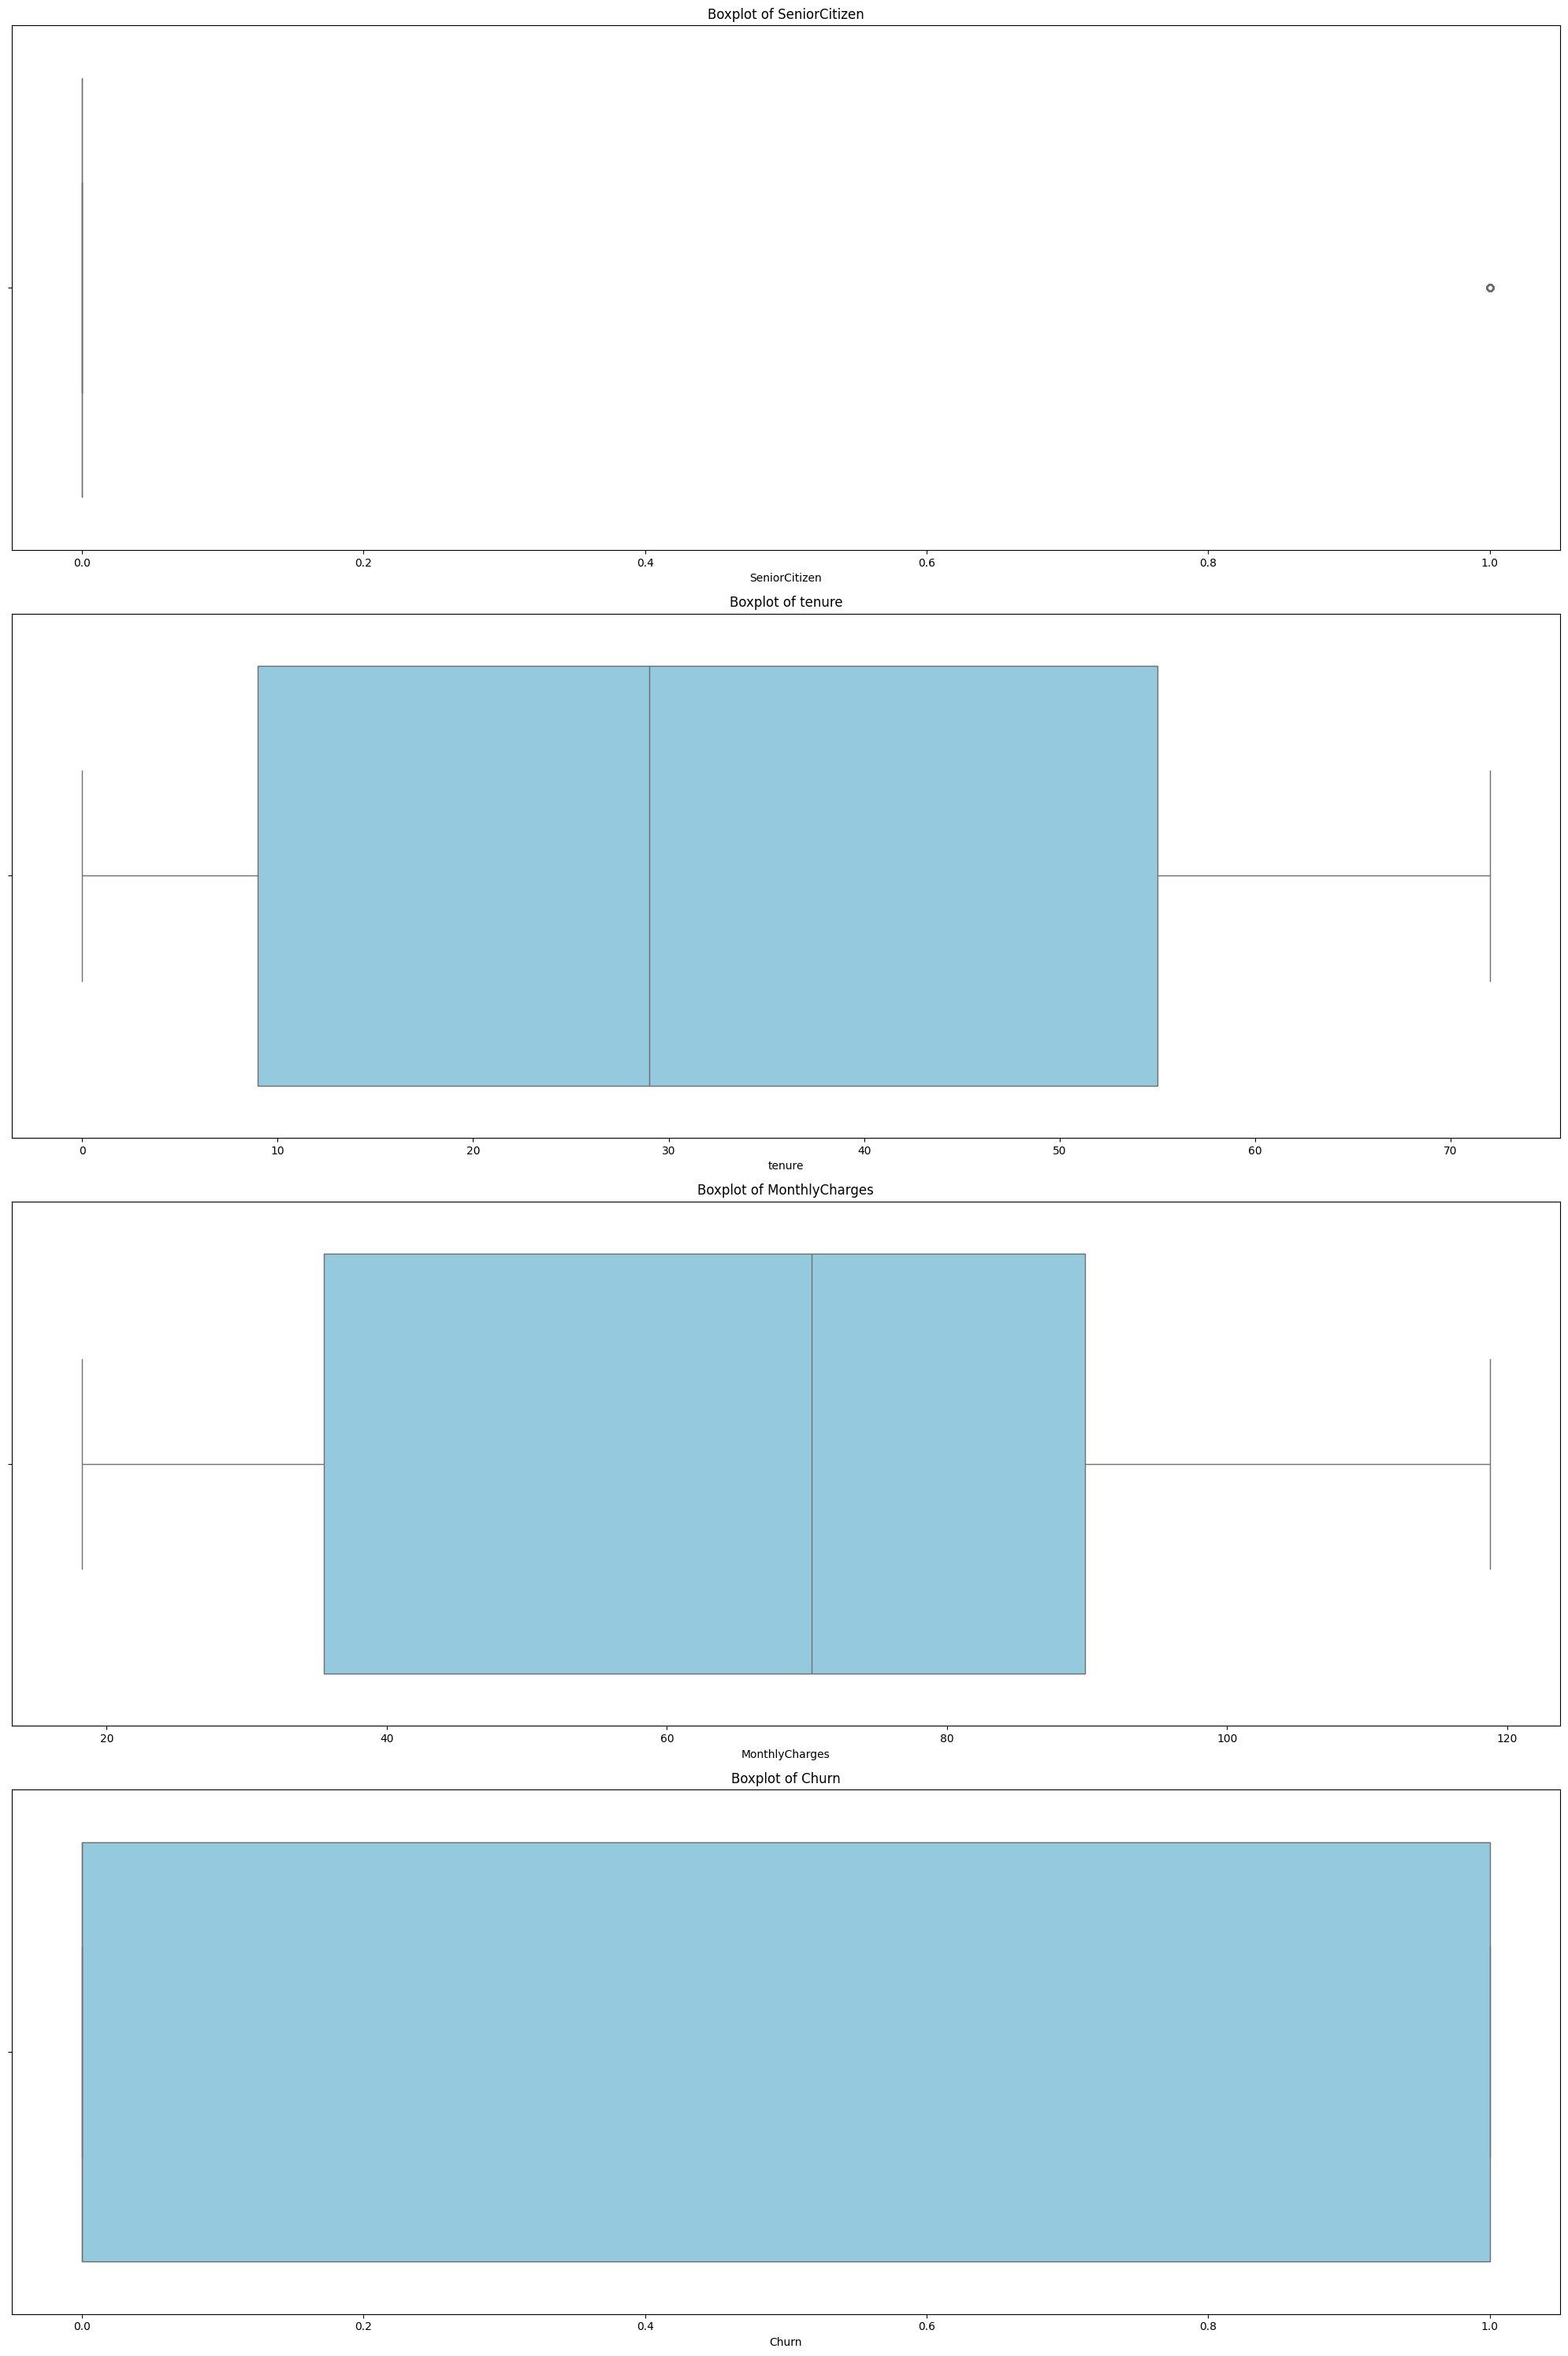

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for boxplot analysis
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Set up the figure
plt.figure(figsize=(20, 30))

# Plot boxplots for each numerical feature including the target variable 'OUTCOME'
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()

plt.show()

In [17]:
numerical_data.nunique()

,0
SeniorCitizen,2
tenure,73
MonthlyCharges,1585
Churn,2


In [18]:
numerical_data.isnull().sum()

,0
SeniorCitizen,0
tenure,0
MonthlyCharges,0
Churn,0


In [ ]:
# unique values counts
unique_counts=categorical_data.nunique()
print(unique_counts)

customerID          7043
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
dtype: int64


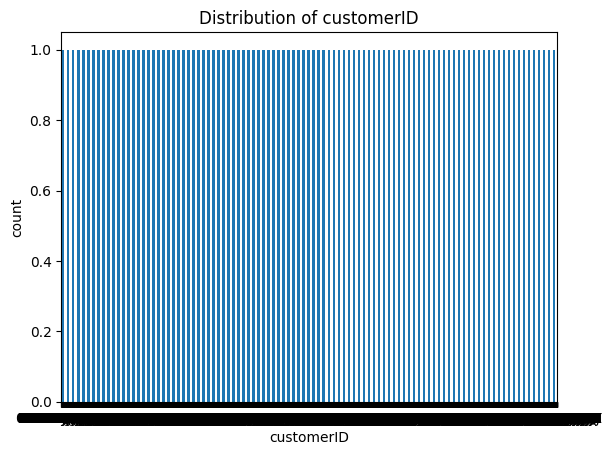

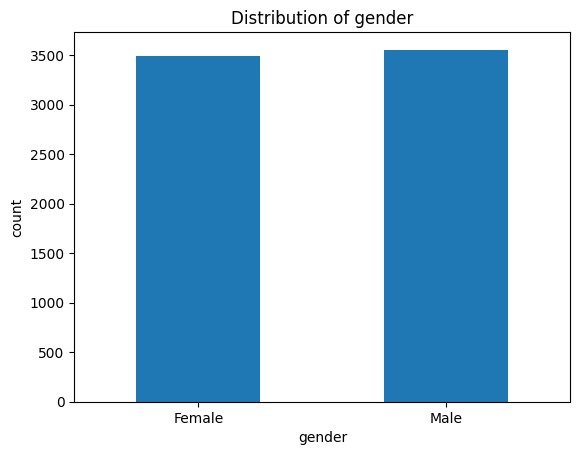

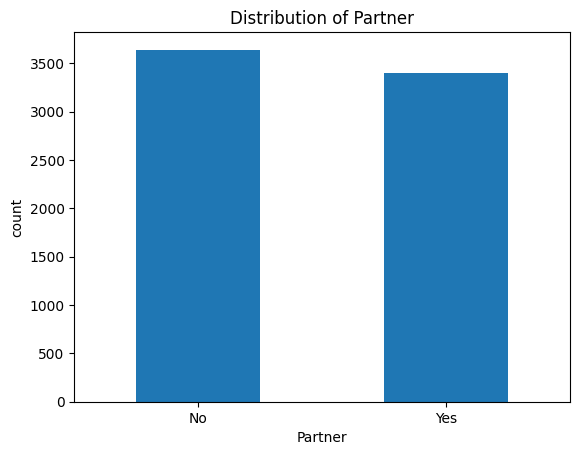

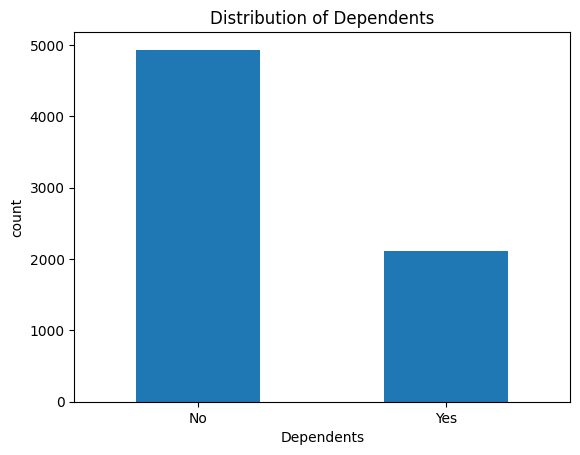

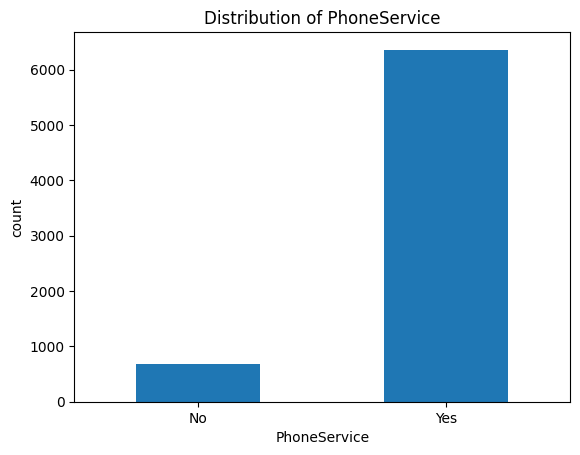

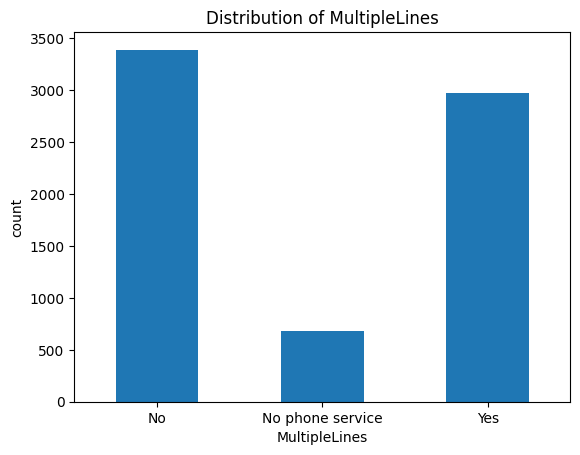

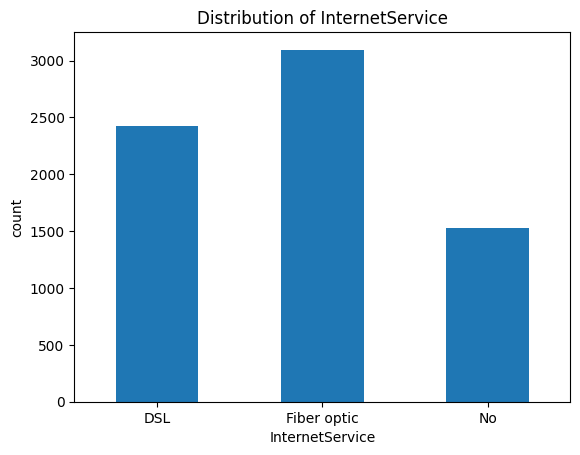

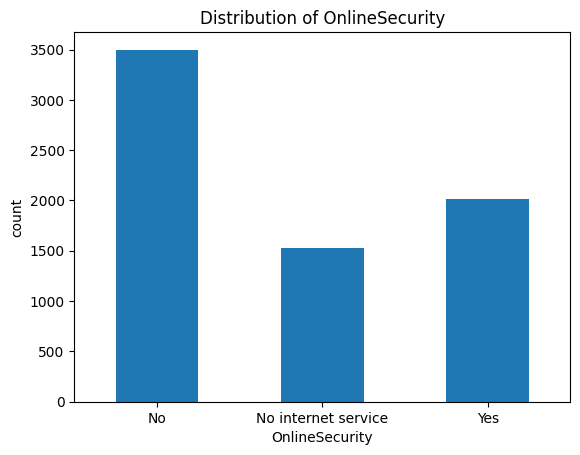

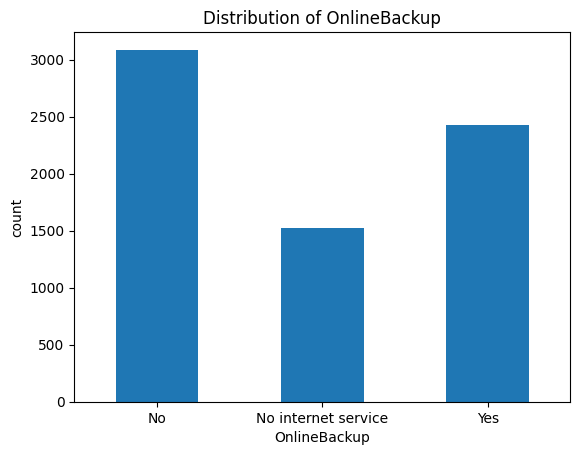

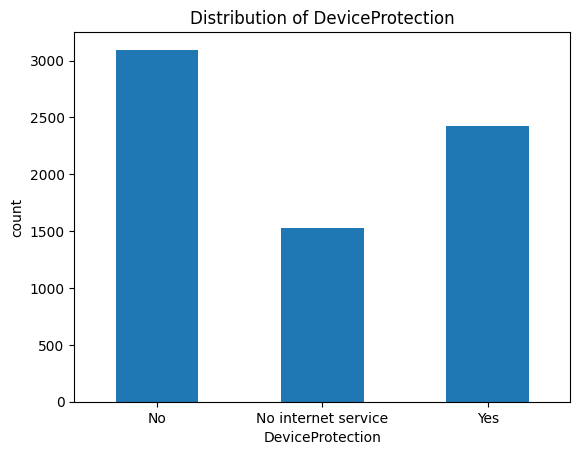

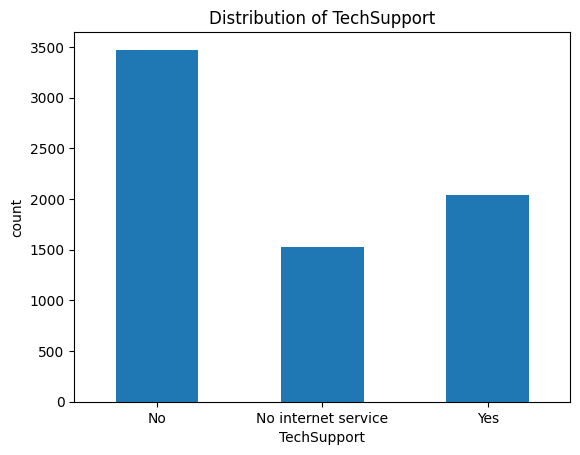

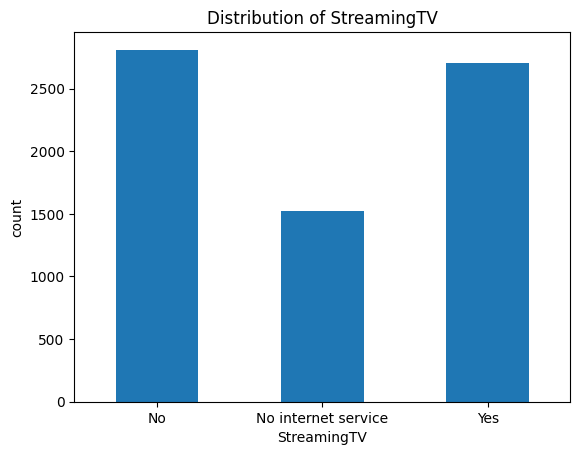

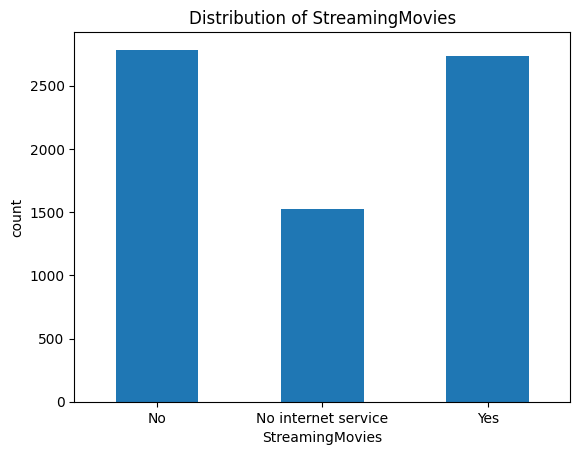

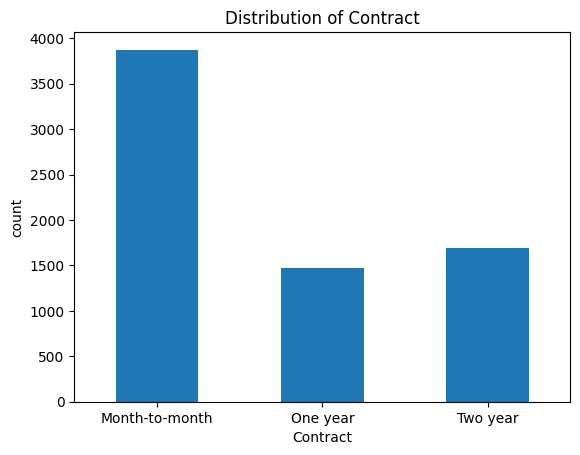

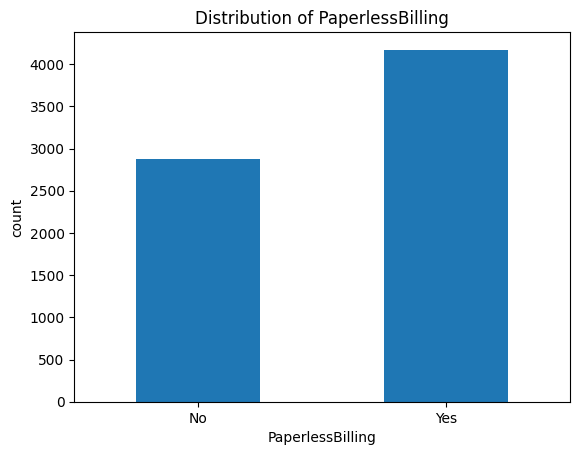

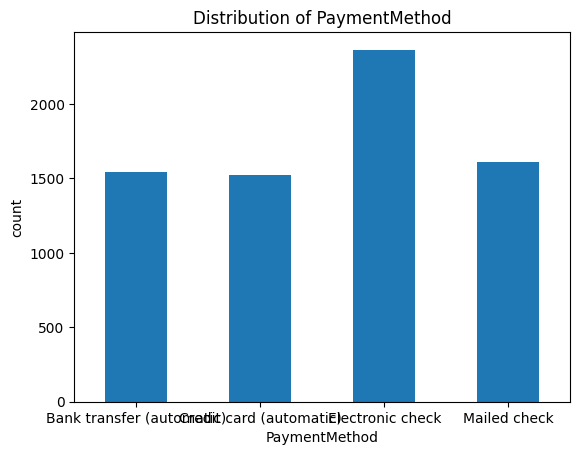

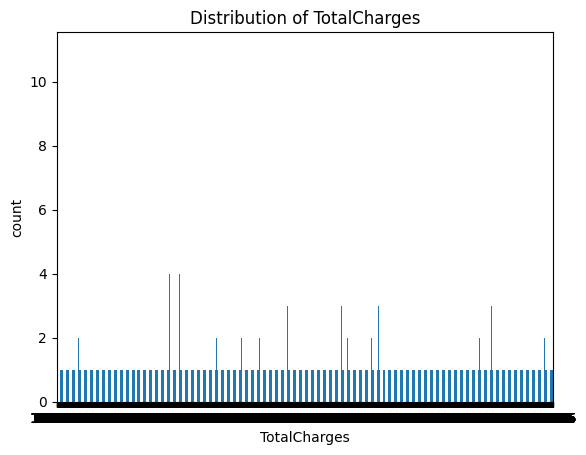

In [ ]:
for col in categorical_features:
    plt.title(f'Distribution of {col}')
    categorical_data[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col,ylabel='count')
    plt.show()

In [ ]:
# Calculating the correlation matrix
correlation_matrix = numerical_data.corr()
correlation_matrix

,SeniorCitizen,tenure,MonthlyCharges,Churn
SeniorCitizen,1.000000,0.016567,0.220173,0.150889
tenure,0.016567,1.000000,0.247900,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.193356
Churn,0.150889,-0.352229,0.193356,1.000000


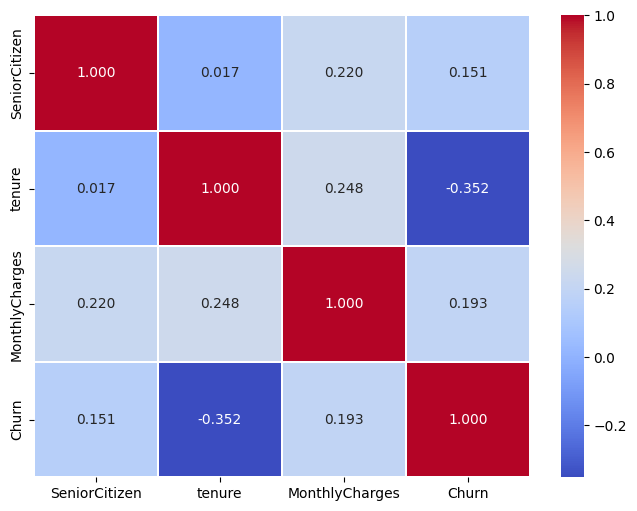

In [ ]:
# Plotting the heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.3)
plt.show()

3. Dataset Preprocessing

In [ ]:
df['TotalCharges'].value_counts()


,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
130.15,1
3211.9,1
7843.55,1


In [ ]:
'''
    TotalCharges contains invalid string values, So conveting those to NaN and replacing using the median to prevent data loss
'''
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)




/tmp/ipython-input-989144918.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
## Dropping customerID column as it is no use of churn prediction
df.drop('customerID', axis=1, inplace=True)

In [ ]:
## Encoding Categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

## One Hot Encoding was applied to convert categorical variables into numerical format while avoiding the dummy variable trap.
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [ ]:
## Separating features and target


X = df.drop('Churn', axis=1)
y = df['Churn']


In [ ]:
'''
   Using Standard Scaling to narmalize feature ranges beacause features like tenure and MonthlyCharges have different ranges , distanced based models  (KNN,Neural Networks) need scaling.
'''

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


4.Dataset Splitting(stratified):

Stratified splitting ensures that both training and testing datasets maintain the same class distribution of the target variable (Churn), which is important for imbalanced datasets.

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)


In [ ]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (5634, 30)
Testing set size: (1409, 30)


Model 1 : Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc


In [ ]:
## Max Iter=1000 ensures convergence for large datasets

log_reg = LogisticRegression(max_iter=1000)

In [ ]:
##Model learning relationship between features and churn

log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
'''
    y_pred_lr → predicted class (0 or 1)
    y_prob_lr → probability of churn (used for ROC)
'''


y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]


In [ ]:
## Accuracy

lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", lr_accuracy)


Logistic Regression Accuracy: 0.8069552874378992


In [ ]:
'''
    Precision : how many predicted churns were correct
    Recall : how many actual churns were detected
'''

lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)

print("Precision:", lr_precision)
print("Recall:", lr_recall)


Precision: 0.6583850931677019
Recall: 0.5668449197860963


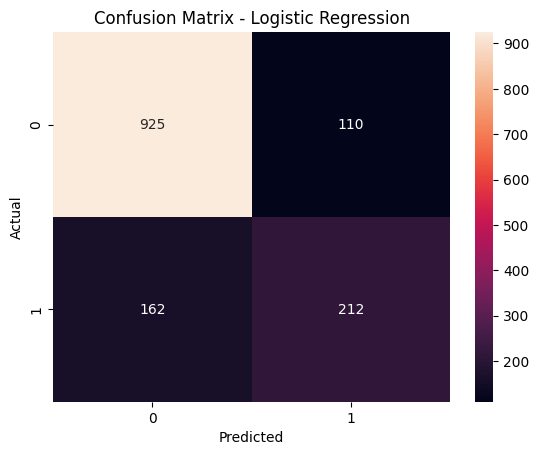

In [ ]:
## Confusion Matrix
## The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives.


cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure()
sns.heatmap(cm_lr, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [ ]:
## Classification Report

print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [ ]:
## ROC & AUC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = auc(fpr_lr, tpr_lr)



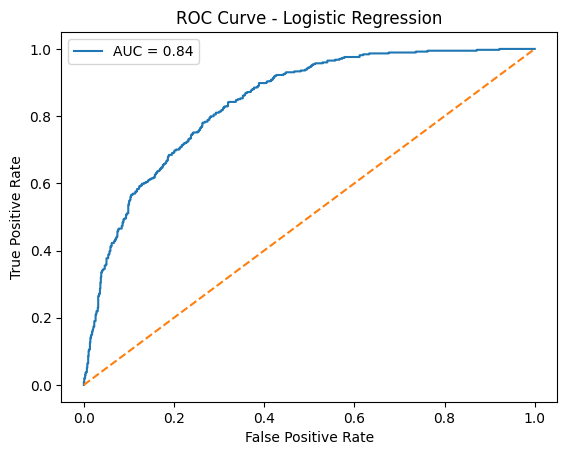

In [ ]:
## Plotting ROC Curve
plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f"AUC = {auc_lr:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()



2. KNN Model

KNN is a distance-based classification algorithm that predicts the class of a data point based on the majority class among its k nearest neighbors. Feature scaling is required because KNN relies on distance calculations.


In [ ]:
# libraries

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


In [ ]:
# Model initialization & Training

# Initializing KNN classifier
# k = 5 is a common default choice
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

# Training the model
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
# Prediction on test

# Class prediction
y_pred_knn = knn.predict(X_test)

# Probability prediction (needed for ROC curve)
y_prob_knn = knn.predict_proba(X_test)[:, 1]


In [ ]:
#Model evaluation

#Accuracy

knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_accuracy)


KNN Accuracy: 0.7466288147622427


In [ ]:
print("KNN Classification Report:\n")
print(classification_report(y_test, y_pred_knn))


KNN Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1035
           1       0.52      0.50      0.51       374

    accuracy                           0.75      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.74      0.75      0.74      1409



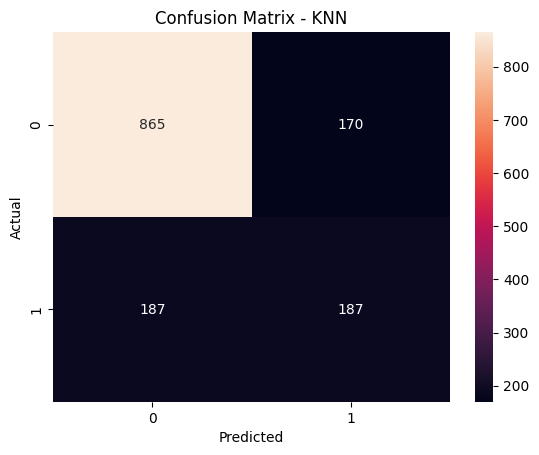

In [ ]:
#Confuisin Matrix

#Confuisin Matrix

## The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives.


cm_lr = confusion_matrix(y_test, y_pred_knn)
plt.figure()
sns.heatmap(cm_lr, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

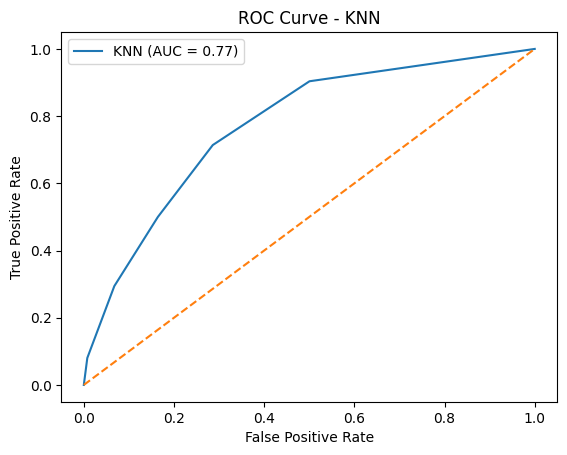

In [ ]:
#ROC curve & AUC score

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend()
plt.show()


3. Naive Bayes

is a probabilistic classifier based on Bayes’ Theorem. It assumes independence between features and is computationally efficient, making it suitable for large datasets.
Since features are numerical, Gaussian Naive Bayes is used.

In [ ]:
from sklearn.naive_bayes import GaussianNB


In [ ]:
# Model initialization & Training
# Initializing Gaussian Naive Bayes
nb = GaussianNB()

# Training the model
nb.fit(X_train, y_train)


GaussianNB()

In [ ]:
#Prediction on test data

# Predicting class labels
y_pred_nb = nb.predict(X_test)

# Predicting probabilities
y_prob_nb = nb.predict_proba(X_test)[:, 1]


In [ ]:
# Model Evaluation

# Accuracy

nb_accuracy = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", nb_accuracy)


Naive Bayes Accuracy: 0.6557842441447835


In [ ]:
# Classification Report
print("Naive Bayes Classification Report:\n")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.58      0.71      1035
           1       0.43      0.87      0.57       374

    accuracy                           0.66      1409
   macro avg       0.67      0.72      0.64      1409
weighted avg       0.79      0.66      0.67      1409



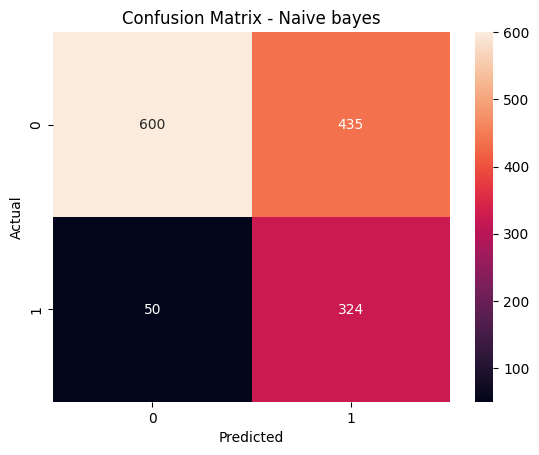

In [ ]:
# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_nb)
plt.figure()
sns.heatmap(cm_lr, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive bayes")
plt.show()


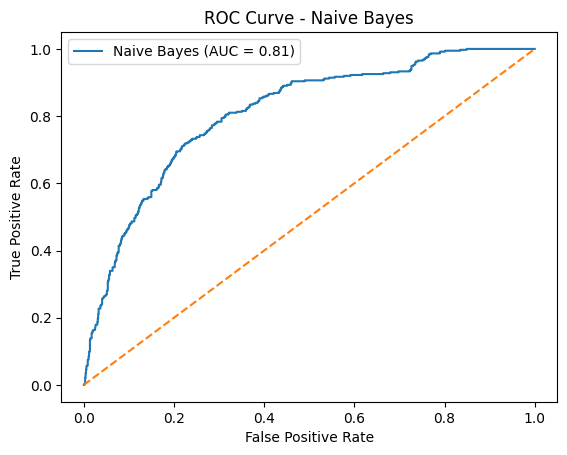

In [ ]:
# ROC curve and AUC score

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
auc_nb = auc(fpr_nb, tpr_nb)

plt.figure()
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc_nb:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naive Bayes")
plt.legend()
plt.show()


4. Neural network


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [ ]:
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    learning_rate_init=0.001,
    max_iter=500,
    early_stopping=True,
    validation_fraction=0.1,
    random_state=42
)

mlp.fit(X_train_sm, y_train_sm)




MLPClassifier(early_stopping=True, hidden_layer_sizes=(128, 64, 32),
              max_iter=500, random_state=42)

In [ ]:
y_prob_nn = mlp.predict_proba(X_test)[:, 1]

fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn)
auc_nn = auc(fpr_nn, tpr_nn)

print("Neural Network AUC after SMOTE:", auc_nn)



Neural Network AUC after SMOTE: 0.8013123562995687


In [ ]:
y_pred_nn = mlp.predict(X_test)
y_prob_nn = mlp.predict_proba(X_test)[:, 1]


In [ ]:
nn_accuracy = accuracy_score(y_test, y_pred_nn)
print("Neural Network Accuracy:", nn_accuracy)


Neural Network Accuracy: 0.7565649396735273


In [ ]:
nn_precision = precision_score(y_test, y_pred_nn)
nn_recall = recall_score(y_test, y_pred_nn)

print("Precision:", nn_precision)
print("Recall:", nn_recall)


Precision: 0.5304518664047151
Recall: 0.7219251336898396


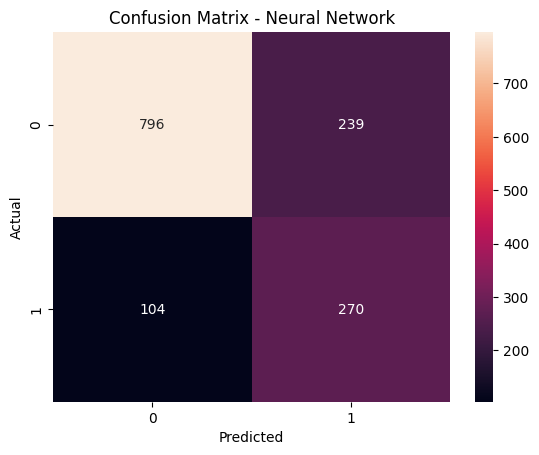

In [ ]:
cm_nn = confusion_matrix(y_test, y_pred_nn)

plt.figure()
sns.heatmap(cm_nn, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Neural Network")
plt.show()


In [ ]:
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn)
auc_nn = auc(fpr_nn, tpr_nn)

print("Neural Network AUC:", auc_nn)


Neural Network AUC: 0.8013123562995687


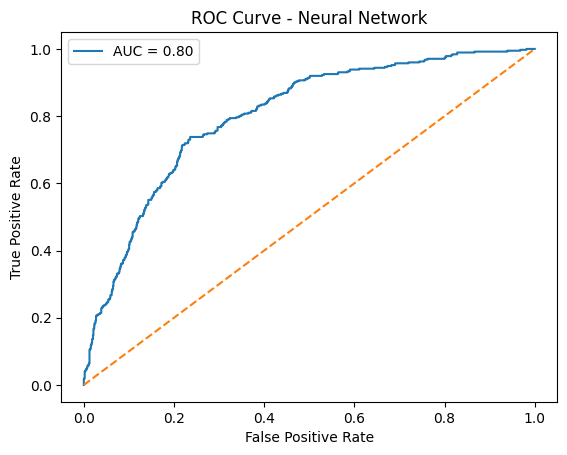

In [ ]:
plt.figure()
plt.plot(fpr_nn, tpr_nn, label=f"AUC = {auc_nn:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Neural Network")
plt.legend()
plt.show()


k Means


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [ ]:
# Removing target column for unsupervised learning
X_kmeans = df.drop(columns=['Churn'])


In [ ]:
#Feature scaling
scaler = StandardScaler()
X_kmeans_scaled = scaler.fit_transform(X_kmeans)


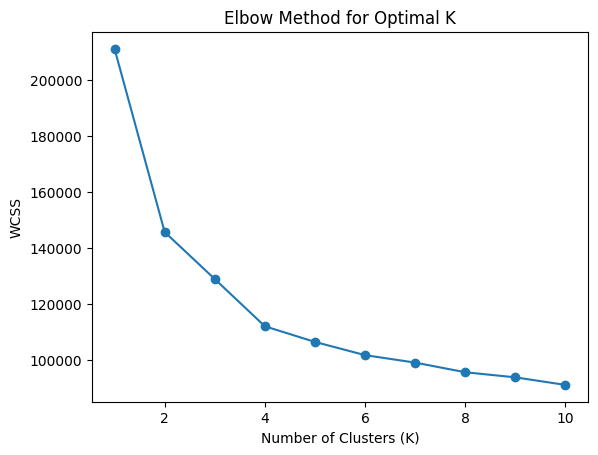

In [ ]:
#optimal no of clusters( Elbow method)
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_kmeans_scaled)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


In [ ]:
#Applying kmeans
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit and predict clusters
clusters = kmeans.fit_predict(X_kmeans_scaled)

# Add cluster labels to dataset
df['Cluster'] = clusters


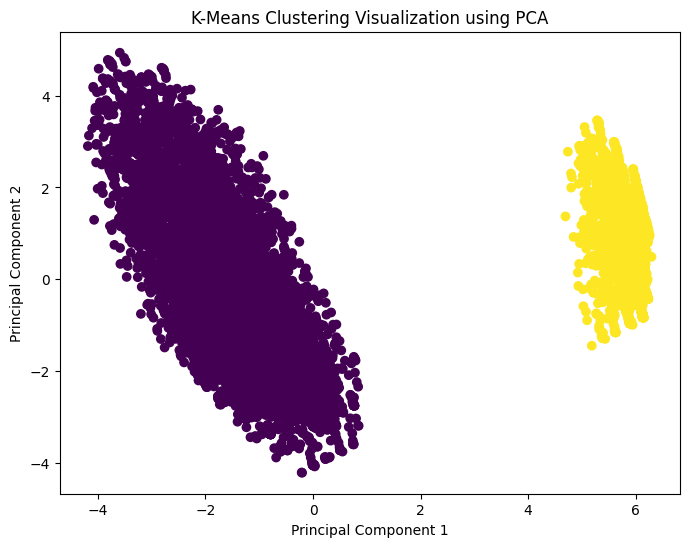

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_kmeans_scaled)

# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=clusters
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering Visualization using PCA")
plt.show()


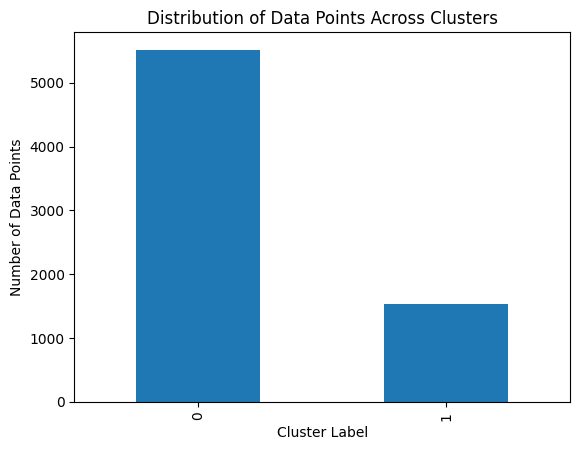

In [ ]:
df['Cluster'].value_counts().plot(kind='bar')
plt.xlabel("Cluster Label")
plt.ylabel("Number of Data Points")
plt.title("Distribution of Data Points Across Clusters")
plt.show()


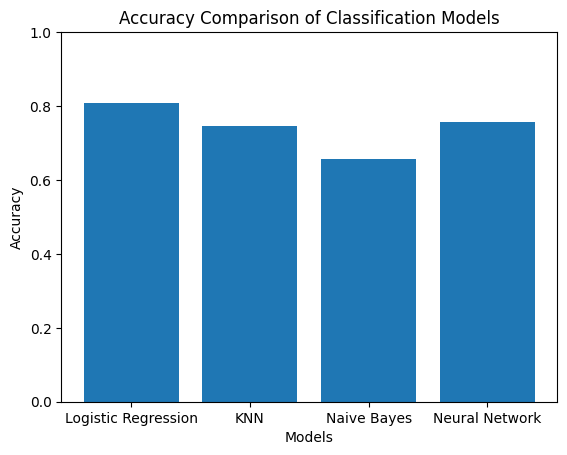

In [ ]:
models = [
    'Logistic Regression',
    'KNN',
    'Naive Bayes',
    'Neural Network'
]

accuracies = [
    lr_accuracy,
    knn_accuracy,
    nb_accuracy,
    nn_accuracy
]

plt.figure()
plt.bar(models, accuracies)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Classification Models")
plt.ylim(0, 1)
plt.show()


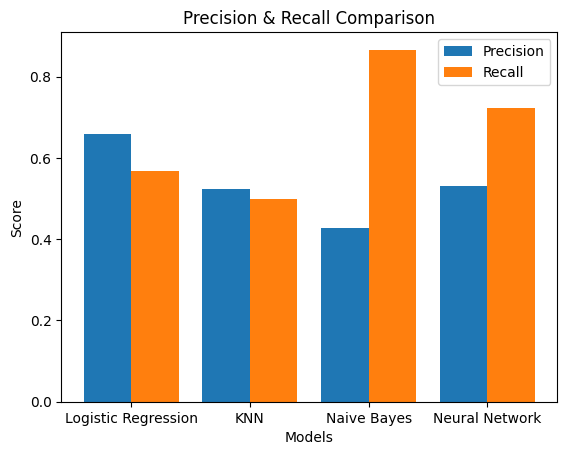

In [ ]:
precision_scores = [
    precision_score(y_test, y_pred_lr),
    precision_score(y_test, y_pred_knn),
    precision_score(y_test, y_pred_nb),
    precision_score(y_test, y_pred_nn)
]

recall_scores = [
    recall_score(y_test, y_pred_lr),
    recall_score(y_test, y_pred_knn),
    recall_score(y_test, y_pred_nb),
    recall_score(y_test, y_pred_nn)
]

x = range(len(models))

plt.figure()
plt.bar(x, precision_scores, width=0.4, label='Precision')
plt.bar([i + 0.4 for i in x], recall_scores, width=0.4, label='Recall')
plt.xticks([i + 0.2 for i in x], models)
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Precision & Recall Comparison")
plt.legend()
plt.show()


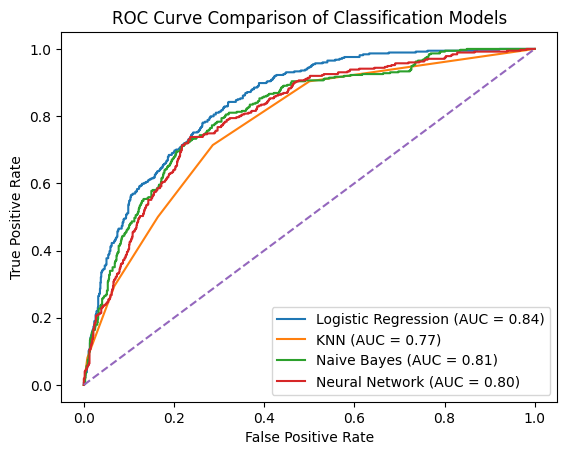

In [ ]:
plt.figure()

plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.2f})")
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc_nb:.2f})")
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {auc_nn:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison of Classification Models")
plt.legend()
plt.show()

In [ ]:
print("Logistic Regression\n", classification_report(y_test, y_pred_lr))
print("KNN\n", classification_report(y_test, y_pred_knn))
print("Naive Bayes\n", classification_report(y_test, y_pred_nb))
print("Neural Network\n", classification_report(y_test, y_pred_nn))

Logistic Regression
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

KNN
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1035
           1       0.52      0.50      0.51       374

    accuracy                           0.75      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.74      0.75      0.74      1409

Naive Bayes
               precision    recall  f1-score   support

           0       0.92      0.58      0.71      1035
           1       0.43      0.87      0.57       374

    accuracy                           0.66      1409
   macro avg       0.67      0.72      0.64      1409
weighted avg       0.79      0.66  